In [1]:
import pandas as pd


In [2]:
yob1880 = pd.read_csv('babynames/yob1880.txt', names = ['name', 'gender', 'births'])

In [22]:
# yob1880.groupby('gender')['births'].sum()

columns = ['name', 'gender', 'births']
pieces = []
for year in range(1880, 2011):
    frame = pd.read_csv("babynames/yob%d.txt" %year, names = columns)
    frame['year'] = year
    pieces.append(frame)
print(pieces)
# print(frame)



[           name gender  births  year
0          Mary      F    7065  1880
1          Anna      F    2604  1880
2          Emma      F    2003  1880
3     Elizabeth      F    1939  1880
4        Minnie      F    1746  1880
...         ...    ...     ...   ...
1995     Woodie      M       5  1880
1996     Worthy      M       5  1880
1997     Wright      M       5  1880
1998       York      M       5  1880
1999  Zachariah      M       5  1880

[2000 rows x 4 columns],            name gender  births  year
0          Mary      F    6919  1881
1          Anna      F    2698  1881
2          Emma      F    2034  1881
3     Elizabeth      F    1852  1881
4      Margaret      F    1658  1881
...         ...    ...     ...   ...
1930     Wiliam      M       5  1881
1931     Wilton      M       5  1881
1932       Wing      M       5  1881
1933       Wood      M       5  1881
1934     Wright      M       5  1881

[1935 rows x 4 columns],            name gender  births  year
0          Mary      F

In [145]:
names = pd.concat(pieces, ignore_index=True)
names

totalbirths = names.pivot_table('births', index= 'year', columns='gender', aggfunc=sum)

In [40]:
import matplotlib.pyplot as plt



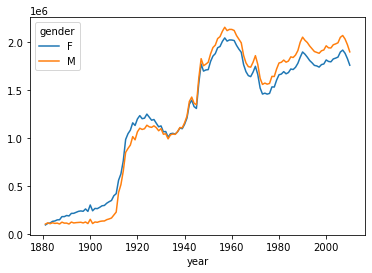

In [41]:
totalbirth.plot()



In [28]:
# 이름이 전체 출생수에서 차지하는 비율을 names에 추가 
# names['prop'] =구현

names2 = names.groupby(['year', 'gender']).births.sum()


# filter1 = year == 1880 & gender == F
names2
names2.loc[1880].loc['F']
names2[1880]['F']

names.loc[0]

round(names.loc[0]['birth']/names2.loc[1880].loc["F"],3)




KeyError: 'birth'

In [38]:
def addProp(group): #그룹화된 객체가 전달됨
    group['Prop'] = group.births/group.births.sum() #그룹은 년도와 성별로 나눠짐, 예 1801년 여자아이의 그룹이고, 각 그룹에 따른 비율을 계산하는 거 
    return group

names = names.groupby(['year','gender']).apply(addProp)

names


,name,gender,births,year,Prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [45]:
# names에서 year와 성별기준으로 그룹화를 한 다음 prop칼컴 값에 대한 합계를 출력

# names.groupby(['year', 'gender'])['Prop'].sum()
names.groupby(['year', 'gender'])['Prop'].max()



year  gender
1880  F         0.077643
      M         0.087381
1881  F         0.075243
      M         0.087039
1882  F         0.075558
                  ...   
2008  M         0.011075
2009  F         0.012159
      M         0.010660
2010  F         0.012923
      M         0.011523
Name: Prop, Length: 262, dtype: float64

In [57]:
def getTop10000(group):
    return group.sort_values('births', ascending = False)[:1000]

top1000 = names.groupby(['year', 'gender']).apply(getTop10000)

In [60]:
top1000.reset_index(drop = True, inplace = True)
# names
top1000

,name,gender,births,year,Prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [64]:
# top1000에서 성별이 남자인 데이터를 추출하여 boys

filter1 = top1000['gender'] == 'M'
filter2 = top1000['gender'] == 'F'
boys = top1000[filter1]
girls = top1000[filter2]

In [66]:
boys
girls

,name,gender,births,year,Prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
260872,Violeta,F,250,2010,0.000142
260873,Leilah,F,250,2010,0.000142
260874,Alaysia,F,250,2010,0.000142
260875,Dania,F,249,2010,0.000142


In [81]:
total_birth = top1000.pivot_table('births', index = 'year', columns = 'name', aggfunc = sum)
total_birth

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


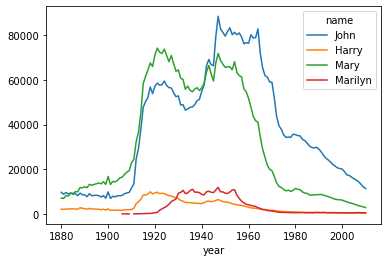

In [89]:
sub = total_birth[['John', 'Harry', 'Mary', 'Marilyn']]
sub.plot()

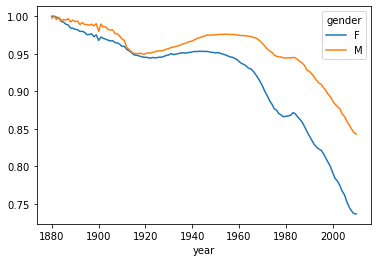

In [92]:
table = top1000.pivot_table('Prop', index = 'year', columns = 'gender', aggfunc = sum)

table.plot()


In [106]:
df = boys[boys.year==2010]
df
df.sort_values('Prop', ascending=False)
df.sort_values('Prop', ascending=False).Prop # prop열만 추출하겠다. 
df.sort_values('Prop', ascending=False).Prop.cumsum() # 누적합(cumsum)을 구하겠다 
propCumsum=df.sort_values('Prop', ascending=False).Prop.cumsum() # propCumsum에 저장
type(propCumsum) # Series type
propCumsum.searchsorted(0.5)

propCumsum.iloc[116]
# 상위 117명의 아이들이름이 전체에서 50%넘게 차지

propCumsum.values.searchsorted




0.5006516075268308

In [110]:
df = boys[boys.year==1900]
in1900 = df.sort_values('Prop', ascending = False).Prop.cumsum()
in1900.searchsorted(0.5)+1

25

In [121]:
names.name
# 이름의 마지막 글자의 분포, 분포의 변동?

word = 'Mary'
word[-1]

names['last'] = names["name"].str[-1]
names

,name,gender,births,year,last
0,Mary,F,7065,1880,y
1,Anna,F,2604,1880,a
2,Emma,F,2003,1880,a
3,Elizabeth,F,1939,1880,h
4,Minnie,F,1746,1880,e
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,e
1690780,Zyonne,M,5,2010,e
1690781,Zyquarius,M,5,2010,s
1690782,Zyran,M,5,2010,n


In [138]:
getLastLetter = lambda x:x[-1]

lastLetter = names.name.map(getLastLetter)
lastLetter.name = 'last_letter'

lastLetter
# names.name.map()

names.pivot_table('births',index =lastLetter , columns = [ 'gender', 'year'], aggfunc = sum)

gender             F                                                        \
year            1880     1881     1882     1883     1884     1885     1886   
last_letter                                                                  
a            31446.0  31581.0  36536.0  38330.0  43680.0  45408.0  49100.0   
b                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
c                NaN      NaN      5.0      5.0      NaN      NaN      NaN   
d              609.0    607.0    734.0    810.0    916.0    862.0   1007.0   
e            33378.0  34080.0  40399.0  41914.0  48089.0  49616.0  53884.0   
f                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
g                7.0      5.0     12.0      8.0     24.0     11.0     18.0   
h             4863.0   4784.0   5567.0   5701.0   6602.0   6624.0   7146.0   
i               61.0     78.0     81.0     76.0     84.0     92.0     85.0   
j                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
k               13.0     15.0     11.0     17.0     21.0     18.0     27.0   
l             2541.0   2911.0   3527.0   3848.0   4808.0   5144.0   5721.0   
m               58.0     57.0     81.0     86.0     79.0     75.0    103.0   
n             3008.0   2959.0   3576.0   3837.0   4507.0   4735.0   5242.0   
o               30.0     49.0     35.0     47.0     74.0     84.0     93.0   
p                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
q                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
r              481.0    417.0    590.0    640.0    718.0    799.0    917.0   
s             1391.0   1316.0   1637.0   1794.0   2039.0   2127.0   2524.0   
t             2152.0   2165.0   2399.0   2554.0   2825.0   2889.0   3017.0   
u              380.0    427.0    410.0    444.0    490.0    495.0    511.0   
v                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
w                NaN      5.0      NaN      NaN      NaN      NaN      5.0   
x                NaN      NaN      NaN      7.0      NaN      NaN      NaN   
y            10469.0  10404.0  12145.0  12063.0  13917.0  13927.0  14936.0   
z              106.0     95.0    106.0    141.0    148.0    150.0    202.0   

gender                                  ...         M                      \
year            1887     1888     1889  ...      2001      2002      2003   
last_letter                             ...                                 
a            48942.0  59442.0  58631.0  ...   39124.0   38815.0   37825.0   
b                NaN      NaN      NaN  ...   50950.0   49284.0   48065.0   
c                NaN      NaN      NaN  ...   27113.0   27238.0   27697.0   
d             1027.0   1298.0   1374.0  ...   60838.0   55829.0   53391.0   
e            54353.0  66750.0  66663.0  ...  145395.0  144651.0  144769.0   
f                NaN      NaN      NaN  ...    1758.0    1817.0    1819.0   
g               25.0     44.0     28.0  ...    2151.0    2084.0    2009.0   
h             7141.0   8630.0   8826.0  ...   85959.0   88085.0   88226.0   
i              105.0    141.0    134.0  ...   20980.0   23610.0   26011.0   
j                NaN      NaN      NaN  ...    1069.0    1088.0    1203.0   
k               19.0     21.0     22.0  ...   42477.0   42043.0   42296.0   
l             6175.0   7900.0   8395.0  ...  153648.0  153493.0  153862.0   
m               90.0    123.0    137.0  ...   41967.0   42663.0   42790.0   
n             5512.0   6833.0   7103.0  ...  616099.0  630322.0  663419.0   
o               97.0    134.0    142.0  ...   82146.0   83180.0   85423.0   
p                NaN      NaN      NaN  ...    3419.0    3157.0    2982.0   
q                NaN      NaN      NaN  ...     602.0     618.0     585.0   
r              910.0   1207.0   1214.0  ...  165377.0  164821.0  169878.0   
s             2803.0   3582.0   3569.0  ...  143791.0  139595.0  138632.0   
t             3140.0   3816.0   3784.0  ...

In [146]:
table = names.pivot_table('births',index = lastLetter , columns = ['gender', 'year'], aggfunc = sum)

subtable = table.reindex(columns = [1910, 1960, 2010], level='year')
subtable 
# latterprop = subtable/subtable.sum()

gender              F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0